Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1.)Reading the dataset into our environment**

In [3]:
df = pd.read_excel("iris.xls")
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.Classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

Desribing the features:


150 data samples of Iris flower with us.

There are 3 different species of Iris in our sample. Each species has 50 samples beneath them. The 3 species are :

 * Iris-virginica,
 *  Iris-setosa,
 *  Iris-versicolor.

The following features of various iris species have been recorded in our dataset.

* **Sepal length (SL)** - This represents the Length of Iris Sepal,

* **Sepal width (SW)** - Represents the Width of Iris Sepal,

*  **Petal length (PL)** - Represents the Length of Iris Petal

* **Petal width (PW)** - Represents the Width of Iris Petal

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**2.) Do Necessary preprocessing Steps** 


Step 1 : Checking for missing Values and duplicates

In [8]:
df.isna().sum()


SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
df.duplicated().value_counts()


False    147
True       3
dtype: int64

In [10]:
df.Classification.value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [11]:
df[df.duplicated()]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


* There are 3 duplicates in our dataset 
* There are Missing Values present in our Dataset.
* The Missing values are in Sepal length (SL),Sepal width (SW), Petal length (PL) features.

In [13]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Step 2 : Filling the missing Values with the Median**

The skewness is :  0.3068227108046868


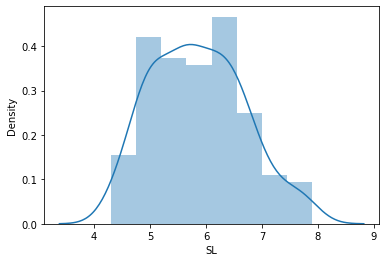

In [17]:
import warnings
sns.distplot(df["SL"])
print("The skewness is : ", df.SL.skew())


The skewness is :  0.37781843718771746


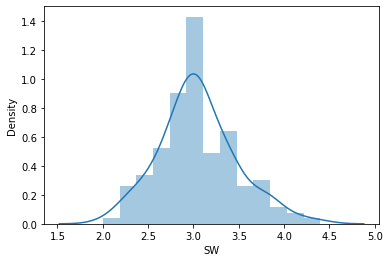

In [18]:
 #Filling the missing value with the median

df["SL"] = df["SL"].fillna(df["SL"].median())
sns.distplot(df["SW"])
print("The skewness is : ", df.SW.skew())

The skewness is :  -0.2689053923783847


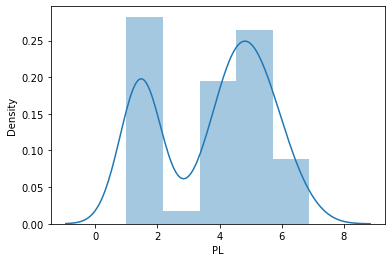

In [19]:
df["SW"] = df["SW"].fillna(df["SW"].median())
sns.distplot(df.PL)
print("The skewness is : ", df.PL.skew())

In [20]:
df["PL"] = df["PL"].fillna(df["PL"].median())
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [22]:
#Step 3 : Checking for Outliers

df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

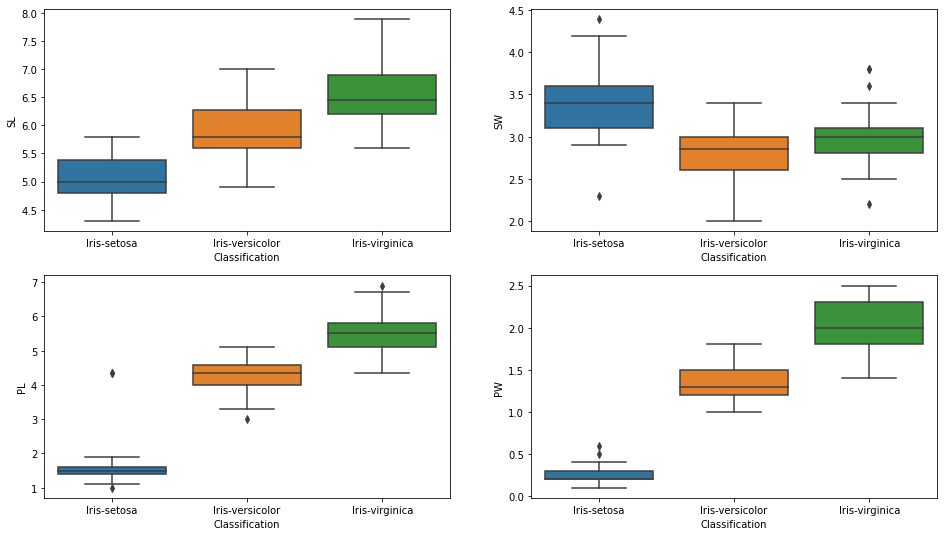

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="SL", x= "Classification", data=df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="SW", x= "Classification", data=df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="PL", x= "Classification", data=df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="PW", x= "Classification", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

In [24]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [26]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


**3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)**

In [31]:
x = df.drop(["Classification"],axis=1)
y = df["Classification"]


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)
x_train.shape


(112, 4)

In [33]:
x_test.shape

(38, 4)

**1) Logistic Regression Model**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

y_train_pred = model.predict(x_train) #To checking training data prediction & accuracy in future

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred))
print("\nThe accuracy score of LR model is : ", accuracy_score(y_test,predict))
print("The F1 score of LR model is : ", f1_score(y_test,predict,average="micro"))
print("\nThe accuracy score of LR model is : \n", confusion_matrix(y_test,predict))

Training Accuracy is :  0.9464285714285714

The accuracy score of LR model is :  0.9736842105263158
The F1 score of LR model is :  0.9736842105263158

The accuracy score of LR model is : 
 [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


**2) KNN Model**

In [37]:
from sklearn.neighbors import KNeighborsClassifier


classifer = KNeighborsClassifier(n_neighbors=4,metric = "minkowski") 
classifer.fit(x_train,y_train)
predict1 = classifer.predict(x_test)

y_train_pred1 = classifer.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred1))
print("\nThe accuracy score of KNN model is : ", accuracy_score(y_test,predict1))
print("The F1 score of KNN model is : ", f1_score(y_test,predict1,average="micro"))
print("\nThe confusion matrix of KNN model is : \n", confusion_matrix(y_test,predict1))

Training Accuracy is :  0.9553571428571429

The accuracy score of KNN model is :  0.9736842105263158
The F1 score of KNN model is :  0.9736842105263158

The confusion matrix of KNN model is : 
 [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


**3) SVM Model**

**Linear SVM Model**

In [39]:

svm_linear = SVC(kernel= "linear")
svm_linear.fit(x_train,y_train)
predict2a = svm_linear.predict(x_test)

y_train_pred2a = svm_linear.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred2a))
print("\nThe accuracy score of linear SVM model is : ", accuracy_score(y_test,predict2a))
print("The f1 score of linear SVM model is : ", f1_score(y_test,predict2a, average="micro"))
print("\nThe confusion matrix for linear SVM model is : \n", confusion_matrix(y_test,predict2a))

Training Accuracy is :  0.9642857142857143

The accuracy score of linear SVM model is :  1.0
The f1 score of linear SVM model is :  1.0

The confusion matrix for linear SVM model is : 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


**4) Decision Tree Model**

In [41]:

from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
predict3 = d_tree.predict(x_test)

y_train_pred3 = d_tree.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred3))
print("\nThe accuracy score of Decision tree model is : ", accuracy_score(y_test,predict3))
print("The f1 score of Decision tree model is : ", f1_score(y_test,predict3,average="micro"))
print("\nThe confusion matrix of Decision tree model is : \n", confusion_matrix(y_test,predict3))

Training Accuracy is :  1.0

The accuracy score of Decision tree model is :  1.0
The f1 score of Decision tree model is :  1.0

The confusion matrix of Decision tree model is : 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


**5) Random Forest Classifier Model**

In [42]:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
predict4 = rf_model.predict(x_test)

y_train_pred4 = rf_model.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred4))
print("\nThe accuracy score for Random Forest Model is : ", accuracy_score(y_test,predict4))
print("The f1 score is : ", f1_score(y_test,predict4,average="micro"))
print("\n The confusion matrix is : \n", confusion_matrix(y_test,predict4))

Training Accuracy is :  1.0

The accuracy score for Random Forest Model is :  1.0
The f1 score is :  1.0

 The confusion matrix is : 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


***Overall Summary for the Various models created :***

| Model Name | Accuracy score|
|- - -| - - -|
|*Logistic Regression Model*|0.974|
|*KNN Model*|0.974|
|*Linear SVM  Model*|1.0|
|*Decision Tree Modal*|1.0|
|*Random Forest Classifier Model*|1.0|




***After Analysing the Data***

In general terms , all the Models are performing relatively well.

**Linear SVM Model**

**Decision Tree Model**

**Random Forest Classifier Model**

These three have better accuracy score as **1.0**

This is mainly because, Tree-based models are generally not much affected by outliers in our dataset, while regression-based models are.